<h1>TASK 3

<h2>PERTURBATION METHODE (RECTANGULAR-CORE WAVEGUIDE)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')

<h2>DEFINING PARAMTERES

In [3]:
k0 = 4.52027 # Defining k0=2π/λ and λ=1.39μm
n1 = 1.50 # Defining refractive index of core
n2 = 1.48 # Defining refractive index of cladding
a=4 # Defining leangth of strip in μm
b=2 # Defining breadth of strip in μm

In [4]:
v1=(k0*a/2)*(n1**2-n2**2)**0.5
v2=(k0*b/2)*(n1**2-n2**2)**0.5
print("v1 =",v1)
print("v2 =",v2)

v1 = 2.2070770861253055
v2 = 1.1035385430626528


<h2>SOLVING TRANSCENDENTALE EQUATION

<h3>PLOTTING TRANSCENDENTALE EQUATION

In [5]:
# Defining the equations we need to plot
# for X(x)
# Defining functions in Transcendental equation for symmetric mode
def func_1_symmetric(μ1):
    return μ1* np.tan(μ1)
def func_2_symmetric(μ1):
    return (v1**2-μ1**2) ** 0.5

# Defining functions in Transcendental equation for antisymmetric mode
def func_1_antisymmetric(μ1):
    return -μ1 * ( 1/np.tan(μ1) )
# for Y(y)
# Defining functions in Transcendental equation for symmetric mode
def func_3_symmetric(μ2):
    return μ2* np.tan(μ2)
def func_4_symmetric(μ2):
    return (v2**2-μ2**2) ** 0.5
# Defining functions in Transcendental equation for antisymmetric mode
def func_3_antisymmetric(μ2):
    return -μ2 * ( 1/np.tan(μ2) )

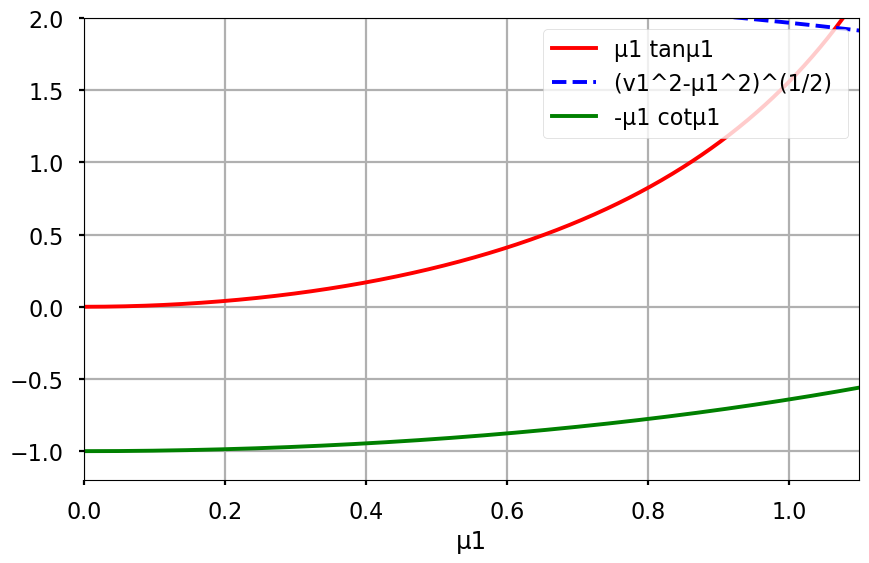

In [6]:
# Plotting Transcendental equation

# List of μ1 points where fucntion will be plotted. We should have μ1 < v1 for right hand side of transendental equation to be 
# defined (func_2_symmetric above)
μ1_list = np.linspace(0.0001,v1,1001)

# Evaluating the function at these μ1_list
func_1_symmetric_list = func_1_symmetric(μ1_list)
func_1_antisymmetric_list = func_1_antisymmetric(μ1_list)
func_1_symmetric_list[:-1][np.diff(func_1_symmetric_list) < 0] = np.nan
func_1_antisymmetric_list[:-1][np.diff(func_1_antisymmetric_list) < 0] = np.nan
plt.figure(figsize=(10,6))
plt.plot(μ1_list,func_1_symmetric_list, 'r-',label = "μ1 tanμ1")
plt.plot(μ1_list, func_2_symmetric(μ1_list), 'b--', label = "(v1^2-μ1^2)^(1/2) ")
plt.plot(μ1_list,func_1_antisymmetric_list , 'g-', label = "-μ1 cotμ1")

# Refining the plots
plt.grid() # adding grid
plt.xlabel('μ1') # labeling the x axis
plt.ylim(-1.2,2) # Setting limit of y axis 
plt.xlim(0,1.1) #setting limit of x axis
plt.legend(loc="upper right") # Defining location of legend


<h3>FINDING ROOTS

From the above graph we can see there are three intersection points corresponding to three modes. These points are at approximately μ1 = 0.7.To find them precisely, we can use the fsolve function from scipy libray with these values as the intial guess for our roots.

In [7]:
# Defining Transcendental equation for symmetric mode
def trans_symmetric(μ1):
    return (μ1 * np.tan(μ1)) - ( v1**2-μ1**2 ) ** 0.5

# Defining functions in Transcendental equation for antisymmetric mode
def trans_antisymmetric(μ1):
    return -μ1 * ( 1/np.tan(μ1) ) - ( v1**2 -μ1**2 ) ** 0.5


In [8]:
# Finding the roots
μ1 = fsolve(trans_symmetric,0.7)

In [9]:
μ1

array([1.06647983])

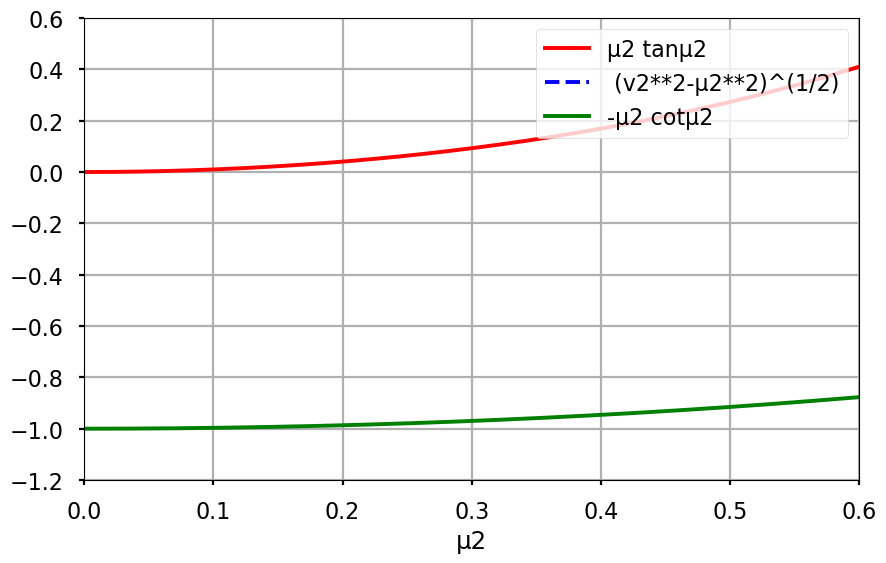

In [10]:
# List of μ2 points where fucntion will be plotted. We should have μ2 < v2 for right hand side of transendental equation to be 
# defined (func_4_symmetric above)
μ2_list = np.linspace(0.00001,v2,10001)

# Evaluating the function at these μ2_list
func_3_symmetric_list = func_3_symmetric(μ2_list)
func_3_antisymmetric_list = func_3_antisymmetric(μ2_list)

func_3_symmetric_list[:-1][np.diff(func_3_symmetric_list) < 0] = np.nan
func_3_antisymmetric_list[:-1][np.diff(func_3_antisymmetric_list) < 0] = np.nan

plt.figure(figsize=(10,6))
plt.plot(μ2_list,func_3_symmetric_list, 'r-',label = "μ2 tanμ2")
plt.plot(μ2_list, func_4_symmetric(μ2_list), 'b--', label = " (v2**2-μ2**2)^(1/2)")
plt.plot(μ2_list,func_3_antisymmetric_list , 'g-', label = "-μ2 cotμ2")

plt.grid() # adding grid
plt.xlabel('μ2') # labeling the x axis
plt.ylim(-1.2,.6) # Setting limit of y axis 
plt.xlim(0,.6) # Setting limit of y axis
plt.legend(loc="upper right") # Defining location of legend


<H3> FINDING ROOTS

From the above graph we can see there are three intersection points corresponding to three modes. These points are at approximately μ2 = 0.4.To find them precisely, we can use the fsolve function from scipy libray with these values as the intial guess for our roots.

In [11]:
# Defining Transcendental equation for symmetric mode
def trans_symmetric(μ2):
    return (μ2 * np.tan(μ2)) - ( v2**2-μ2**2 ) ** 0.5

# Defining functions in Transcendental equation for antisymmetric mode
def trans_antisymmetric(μ2):
    return -μ2 * ( 1/np.tan(μ2) ) - ( v2**2 -μ2**2 ) ** 0.5

In [12]:
# Finding the roots
μ2 = fsolve(trans_symmetric,.4)

In [13]:
μ2

array([0.78254376])

 <h3>FINDING UNPERTURBED PROPAGATION CONSTANT

In [14]:
#We can find βx and βy by using sqrt((k0^2*n1^2)/2-4μ1^2/a^2) and sqrt((k0^2*n2^2)/2-4μ2^2/b^2) respectively.Then the propagation constant β^2=β1^2+β2^2-k0^2*n1^2
βx = ((k0**2*n1**2)/2-4*μ1**2/a**2)
βy = ((k0**2*n2**2)/2-4*μ2**2/b**2)
β0 = βx + βy -(k0**2*n1**2)
print(abs(β0))

[1.50561819]


 <h3>FINDING UNPERTURBED NORMALIZED PROPAGATION CONSTANT

In [15]:
#P0=((β0**2-k0**2*n2**2)/(k0**2*(n1**2-n2**2))(1+1i))**0.5
P0 = 1 - μ1**2/v1**2 - μ2**2/v2**2
print(abs(P0))

[0.26365453]


<h3>PERTURBATION

Using the first order perturbation approach,the normalized propagation constants of the given waveguide is given by,
P^2=P0^2+P1^2
Where P1^2 is the first order perturbation correction to the P0^2, due to the difference between n^2(x,y) and n0^2(x,y) in the corner regions is given by,

In [16]:
p=1 #for symmetric in X
q=1 #for symmetric in Y

P1 = (1 + (v1**2/μ1**2 -1)**(1/2) * ( (2*μ1+p*np.sin(2*μ1)) / (1+p*np.cos(2*μ1))) )**-1 * (1 + (v2**2/μ2**2 -1)**(1/2) * ( (2*μ2+p*np.sin(2*μ2)) / (1+p*np.cos(2*μ2)) ))**-1

In [17]:
P1

array([0.02251903])

Now the total perturbed normailzed propagation constant is given by,
P^2=P0^2+P1^2

In [18]:
P=(abs(P0)+P1)
print(P)

[0.28617356]


<h3> PLOTTING FIELD

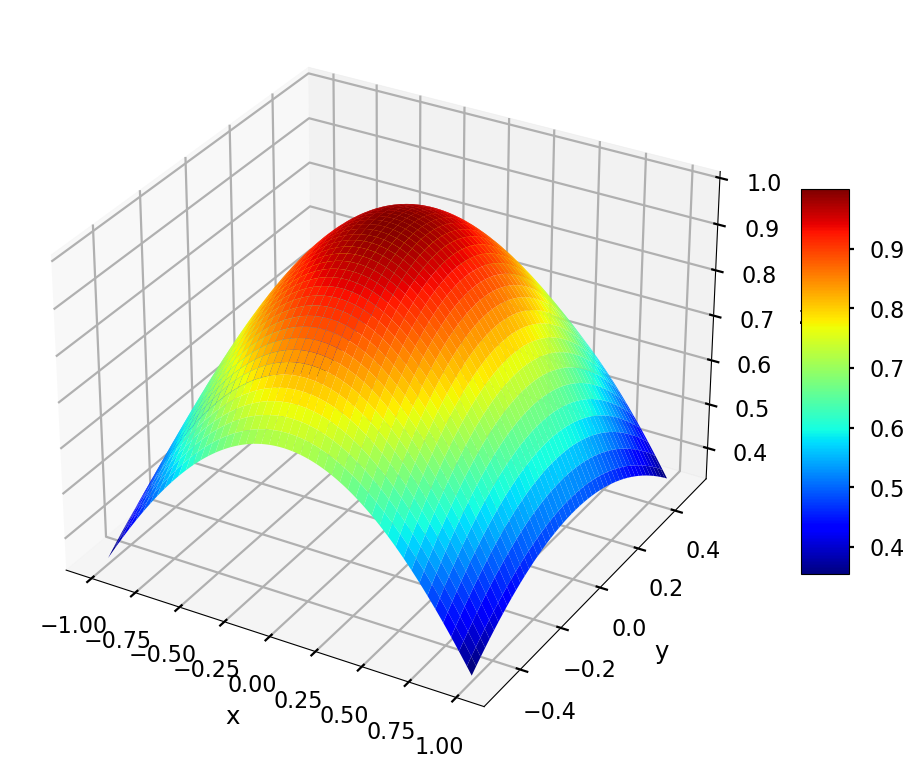

1001

In [19]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

# when ξ<1 and η<1
y = np.linspace(-1/2,1/2,1001)
x = np.linspace(-2/2,2/2, 1001)

X, Y = np.meshgrid(x, y)
A=1
Z = A*np.cos(μ1*X)*np.cos(2*μ2*Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.jet)
# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()  
len(Z)

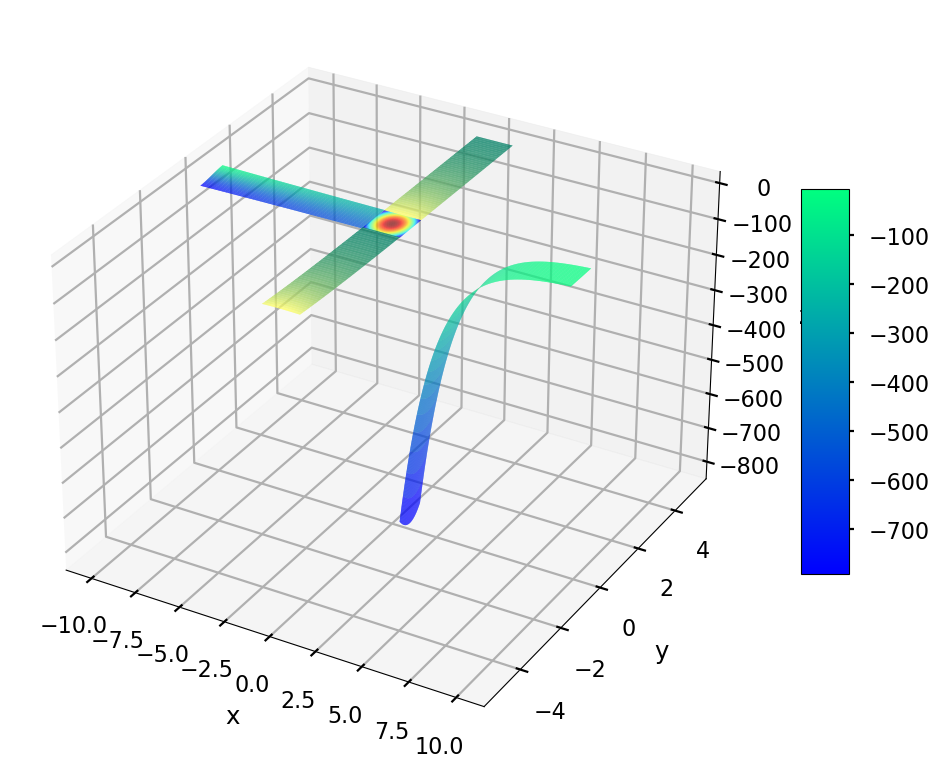

In [20]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

# when ξ<1 and η<1
y = np.linspace(-1/2,1/2,1001)
x = np.linspace(-1,1, 1001)

X, Y = np.meshgrid(x, y)
A=1
Z = A*np.cos(0.3467*X)*np.cos(0.5567*Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.jet)

# when ξ<1 and η>1
y = np.linspace(-5,-1/2,1001)
x = np.linspace(-1,1,1001)
X, Y = np.meshgrid(x, y)
Z = ((A*np.cos(μ2))/np.exp(-(v2**2-μ2**2)**0.5))*np.cos(0.3467*X)*np.exp(-(v2**2-μ2**2)**0.5*0.5714*Y)
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.summer)
y = np.linspace(1/2,5,1001)
x = np.linspace(-1,1,1001)
X, Y = np.meshgrid(x, y)
Z = ((A*np.cos(μ2))/np.exp(-(v2**2-μ2**2)**0.5))*np.cos(0.3467*X)*np.exp(-(v2**2-μ2**2)**0.5*0.5714*Y)
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.summer)

# when ξ>1 and η<1
y = np.linspace(-1/2,1/2,1001)
x = np.linspace(-10,-1,1001)
Z = -((A*np.cos(μ1))/np.exp(-(v1**2-μ1**2)**0.5))*np.cos(0.5567*Y)*np.exp(-(v1**2-μ1**2)**0.5*0.2857*X)

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.winter)

y = np.linspace(-1/2,1/2,1001)
x = np.linspace(1,10,1001)
Z = -((A*np.cos(μ1))/np.exp(-(v1**2-μ1**2)**0.5))*np.cos(0.5567*Y)*np.exp(-(v1**2-μ1**2)**0.5*0.2857*X)

X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.winter)


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)
plt.show()      
